# Data Wrangling and EDA

## Imports

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load Data

### Tesla

In [110]:
tsla = yf.Ticker("TSLA").history(period = "10y")

### Correlated Stocks

NIO Inc.

In [111]:
nio = yf.Ticker("NIO").history(period = "10y")

Rivian

In [112]:
rivn = yf.Ticker("RIVN").history(period = "5y")

Lucid Motors

In [113]:
lcid = yf.Ticker("LCID").history(period = "5y")

Ford

In [114]:
f = yf.Ticker("F").history(period = "10y")

General Motors

In [115]:
gm = yf.Ticker("GM").history(period = "10y")

### Economic indicators

Interest Rate
[FRED](https://fred.stlouisfed.org/series/REAINTRATREARAT10Y)

In [116]:
interest_rate = pd.read_csv("../data/raw/interest_rate.csv")
interest_rate = interest_rate.set_index("DATE")

Consumer Confidence Index
[OECD](https://www.oecd.org/en/data/indicators/consumer-confidence-index-cci.html?oecdcontrol-b2a0dbca4d-var3=2013-01&oecdcontrol-b2a0dbca4d-var4=2024-12)

In [117]:
cci = pd.read_csv("../data/raw/cci.csv", header = [2])
cci = cci.set_index("Category")

Oil Price [macrotrends](https://www.macrotrends.net/1369/crude-oil-price-history-chart)

In [118]:
oil_prices = pd.read_csv("../data/raw/oil_prices.csv", header = [7])
oil_prices = oil_prices.set_index("date")

Median Consumer Price Index [FRED](https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE)

In [119]:
cpi = pd.read_csv("../data/raw/cpi.csv")
cpi = cpi.set_index("DATE")

## Exploring each Time Series

### Tesla

In [120]:
tsla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-25 00:00:00-04:00,17.212667,17.578667,17.212667,17.503332,64771500,0.0,0.0
2014-08-26 00:00:00-04:00,17.665333,17.700001,17.444000,17.449333,57270000,0.0,0.0
2014-08-27 00:00:00-04:00,17.566668,17.615999,17.352667,17.549999,44776500,0.0,0.0
2014-08-28 00:00:00-04:00,17.459333,17.632000,17.442667,17.590668,42673500,0.0,0.0
2014-08-29 00:00:00-04:00,17.913334,18.133333,17.834000,17.980000,96706500,0.0,0.0


We have 4 possible options of prices to forecast: Open, High, Low and Close.  
The closing price is the final price at which the stock trades during regular market hours and is often considered the most important price of the day.

In [121]:
tsla.index

DatetimeIndex(['2014-08-25 00:00:00-04:00', '2014-08-26 00:00:00-04:00',
               '2014-08-27 00:00:00-04:00', '2014-08-28 00:00:00-04:00',
               '2014-08-29 00:00:00-04:00', '2014-09-02 00:00:00-04:00',
               '2014-09-03 00:00:00-04:00', '2014-09-04 00:00:00-04:00',
               '2014-09-05 00:00:00-04:00', '2014-09-08 00:00:00-04:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for Tesla.

### Nio

In [122]:
nio.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0


In [123]:
nio.index

DatetimeIndex(['2018-09-12 00:00:00-04:00', '2018-09-13 00:00:00-04:00',
               '2018-09-14 00:00:00-04:00', '2018-09-17 00:00:00-04:00',
               '2018-09-18 00:00:00-04:00', '2018-09-19 00:00:00-04:00',
               '2018-09-20 00:00:00-04:00', '2018-09-21 00:00:00-04:00',
               '2018-09-24 00:00:00-04:00', '2018-09-25 00:00:00-04:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1497, freq=None)

We have data since 12/09/2018 for Nio.

### Rivian

In [124]:
rivn.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-10 00:00:00-05:00,106.750000,119.459999,95.199997,100.730003,103679500,0.0,0.0
2021-11-11 00:00:00-05:00,114.625000,125.000000,108.010002,122.989998,83668200,0.0,0.0
2021-11-12 00:00:00-05:00,128.645004,135.199997,125.250000,129.949997,50636800,0.0,0.0
2021-11-15 00:00:00-05:00,130.800003,152.529999,127.510002,149.360001,64982300,0.0,0.0
2021-11-16 00:00:00-05:00,163.800003,179.470001,153.779999,172.009995,94036600,0.0,0.0


In [125]:
rivn.index

DatetimeIndex(['2021-11-10 00:00:00-05:00', '2021-11-11 00:00:00-05:00',
               '2021-11-12 00:00:00-05:00', '2021-11-15 00:00:00-05:00',
               '2021-11-16 00:00:00-05:00', '2021-11-17 00:00:00-05:00',
               '2021-11-18 00:00:00-05:00', '2021-11-19 00:00:00-05:00',
               '2021-11-22 00:00:00-05:00', '2021-11-23 00:00:00-05:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=700, freq=None)

We have data since 10/11/2021 for Rivian.

### Lucid Motors

In [126]:
lcid.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-18 00:00:00-04:00,10.25,10.250,9.82,9.89,564300,0.0,0.0
2020-09-21 00:00:00-04:00,9.90,9.960,9.86,9.86,762800,0.0,0.0
2020-09-22 00:00:00-04:00,9.96,9.960,9.85,9.88,1280800,0.0,0.0
2020-09-23 00:00:00-04:00,9.90,9.905,9.79,9.85,192600,0.0,0.0
2020-09-24 00:00:00-04:00,9.85,9.850,9.75,9.77,605500,0.0,0.0


In [127]:
lcid.index

DatetimeIndex(['2020-09-18 00:00:00-04:00', '2020-09-21 00:00:00-04:00',
               '2020-09-22 00:00:00-04:00', '2020-09-23 00:00:00-04:00',
               '2020-09-24 00:00:00-04:00', '2020-09-25 00:00:00-04:00',
               '2020-09-28 00:00:00-04:00', '2020-09-29 00:00:00-04:00',
               '2020-09-30 00:00:00-04:00', '2020-10-01 00:00:00-04:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=989, freq=None)

We have data since 18/09/2020 for Lucid Motors.

### Ford

In [128]:
f.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-25 00:00:00-04:00,10.311147,10.359079,10.305156,10.323130,10770300,0.0,0.0
2014-08-26 00:00:00-04:00,10.341104,10.395027,10.299165,10.299165,12167200,0.0,0.0
2014-08-27 00:00:00-04:00,10.323128,10.424981,10.311145,10.401016,18221100,0.0,0.0
2014-08-28 00:00:00-04:00,10.347093,10.454938,10.311144,10.436963,16855000,0.0,0.0
2014-08-29 00:00:00-04:00,10.466919,10.478902,10.418988,10.430971,15373400,0.0,0.0


In [129]:
f.index

DatetimeIndex(['2014-08-25 00:00:00-04:00', '2014-08-26 00:00:00-04:00',
               '2014-08-27 00:00:00-04:00', '2014-08-28 00:00:00-04:00',
               '2014-08-29 00:00:00-04:00', '2014-09-02 00:00:00-04:00',
               '2014-09-03 00:00:00-04:00', '2014-09-04 00:00:00-04:00',
               '2014-09-05 00:00:00-04:00', '2014-09-08 00:00:00-04:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for Ford.

### General Motors

In [130]:
gm.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-25 00:00:00-04:00,26.514882,26.753617,26.422470,26.699707,9546400,0.0,0.0
2014-08-26 00:00:00-04:00,26.769010,26.953837,26.668898,26.838320,7535000,0.0,0.0
2014-08-27 00:00:00-04:00,26.892231,26.899934,26.630397,26.730509,7118000,0.0,0.0
2014-08-28 00:00:00-04:00,26.561083,26.761311,26.353153,26.707403,5971400,0.0,0.0
2014-08-29 00:00:00-04:00,26.753611,26.838321,26.653496,26.799816,5548700,0.0,0.0


In [131]:
gm.index

DatetimeIndex(['2014-08-25 00:00:00-04:00', '2014-08-26 00:00:00-04:00',
               '2014-08-27 00:00:00-04:00', '2014-08-28 00:00:00-04:00',
               '2014-08-29 00:00:00-04:00', '2014-09-02 00:00:00-04:00',
               '2014-09-03 00:00:00-04:00', '2014-09-04 00:00:00-04:00',
               '2014-09-05 00:00:00-04:00', '2014-09-08 00:00:00-04:00',
               ...
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00',
               '2024-08-16 00:00:00-04:00', '2024-08-19 00:00:00-04:00',
               '2024-08-20 00:00:00-04:00', '2024-08-21 00:00:00-04:00',
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2517, freq=None)

We have 10 years of daily data for General Motors.

### Interest Rate

In [132]:
interest_rate.head()

,REAINTRATREARAT10Y
DATE,
1982-01-01,7.623742
1982-02-01,7.656648
1982-03-01,7.128993
1982-04-01,7.408347
1982-05-01,7.320041


In [133]:
interest_rate.index

Index(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01', '1982-05-01',
       '1982-06-01', '1982-07-01', '1982-08-01', '1982-09-01', '1982-10-01',
       ...
       '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
       '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01'],
      dtype='object', name='DATE', length=512)

We have monthly data since 01/1982 for interest rate.

In [134]:
# Convert the index to datetime format
interest_rate.index = pd.to_datetime(interest_rate.index, format = "%Y-%m-%d")

In [135]:
# Resample the time series to daily frequency, filling missing days with forward fill
interest_rate_daily = interest_rate.resample('D').ffill()

In [136]:
# Rename the index
interest_rate_daily = interest_rate_daily.rename_axis("Date")

### CCI

In [137]:
cci.head()

,OECD
Category,
2013-01-01 00:00:00,98.89291
2013-02-01 00:00:00,99.01170
2013-03-01 00:00:00,99.12190
2013-04-01 00:00:00,99.22903
2013-05-01 00:00:00,99.37544


In [138]:
cci.index

Index(['2013-01-01 00:00:00', '2013-02-01 00:00:00', '2013-03-01 00:00:00',
       '2013-04-01 00:00:00', '2013-05-01 00:00:00', '2013-06-01 00:00:00',
       '2013-07-01 00:00:00', '2013-08-01 00:00:00', '2013-09-01 00:00:00',
       '2013-10-01 00:00:00',
       ...
       '2023-09-01 00:00:00', '2023-10-01 00:00:00', '2023-11-01 00:00:00',
       '2023-12-01 00:00:00', '2024-01-01 00:00:00', '2024-02-01 00:00:00',
       '2024-03-01 00:00:00', '2024-04-01 00:00:00', '2024-05-01 00:00:00',
       '2024-06-01 00:00:00'],
      dtype='object', name='Category', length=138)

We have monthly data since 01/2013 for CCI.

In [139]:
# Convert the index to datetime format
cci.index = pd.to_datetime(cci.index)

In [140]:
# reindex
full_dates = pd.date_range(start = min(cci.index), end = "06/30/2024")
cci = cci.reindex(full_dates)

In [141]:
# Resample the time series to daily frequency, filling missing days with forward fill
cci_daily = cci.ffill()

In [142]:
# Rename the index
cci_daily = cci_daily.rename_axis("Date")

### Oil Prices

In [143]:
oil_prices.head()

,value
date,
2011-08-19,82.33
2011-08-22,84.42
2011-08-23,85.35
2011-08-24,84.99
2011-08-25,85.15


In [144]:
oil_prices.index

Index(['2011-08-19', '2011-08-22', '2011-08-23', '2011-08-24', '2011-08-25',
       '2011-08-26', '2011-08-29', '2011-08-30', '2011-08-31', '2011-09-01',
       ...
       '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01',
       '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06'],
      dtype='object', name='date', length=3317)

We have daily data since 19/08/2011 for Oil Price

In [145]:
# Convert the index to datetime format
oil_prices.index = pd.to_datetime(oil_prices.index)

In [146]:
# There are NA values
oil_prices = oil_prices.dropna()

# As there are days with no data like '2018-08-19', we can apply forward fill.
full_date_range = pd.date_range(start=oil_prices.index.min(), end=oil_prices.index.max(), freq='D')
oil_prices_full = oil_prices.reindex(full_date_range)
oil_prices_filled = oil_prices_full.ffill()

In [147]:
# Rename the index
oil_prices_filled = oil_prices_filled.rename_axis("Date")

### Inflation Rate

In [148]:
cpi.head()

,MEDCPIM158SFRBCLE
DATE,
1983-01-01,5.014653
1983-02-01,4.952545
1983-03-01,3.612261
1983-04-01,4.828054
1983-05-01,3.767326


In [149]:
cpi.index

Index(['1983-01-01', '1983-02-01', '1983-03-01', '1983-04-01', '1983-05-01',
       '1983-06-01', '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
       ...
       '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
       '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01'],
      dtype='object', name='DATE', length=499)

We have monthly data since 01/1983 for CPI.

In [150]:
# Convert the index to datetime format
cpi.index = pd.to_datetime(cpi.index)

In [151]:
# Resample the time series to daily frequency, filling missing days with forward fill
cpi_daily = cpi.resample('D').ffill()

In [152]:
# Rename the index
cpi_daily = cpi_daily.rename_axis("Date")

## Alligning all time series

Check for time series with less data

In [153]:
stocks_list = [tsla, nio, rivn, lcid, f, gm]
indicators_list =[interest_rate_daily, cci_daily, oil_prices_filled, cpi_daily]

In [154]:
for stock in stocks_list:
    print(min(stock.index))

2014-08-25 00:00:00-04:00
2018-09-12 00:00:00-04:00
2021-11-10 00:00:00-05:00
2020-09-18 00:00:00-04:00
2014-08-25 00:00:00-04:00
2014-08-25 00:00:00-04:00


In [155]:
for indicator in indicators_list:
    print(min(indicator.index))

1982-01-01 00:00:00
2013-01-01 00:00:00
2011-08-19 00:00:00
1983-01-01 00:00:00


The shortest time series has its oldest data point in 10/11/2021

In [156]:
for stock in stocks_list:
    print(max(stock.index))

2024-08-23 00:00:00-04:00
2024-08-23 00:00:00-04:00
2024-08-23 00:00:00-04:00
2024-08-23 00:00:00-04:00
2024-08-23 00:00:00-04:00
2024-08-23 00:00:00-04:00


In [157]:
for indicator in indicators_list:
    print(max(indicator.index))

2024-08-01 00:00:00
2024-06-30 00:00:00
2024-08-16 00:00:00
2024-07-01 00:00:00


The max date will be 30/06/2024

In [158]:
tesla_alligned = tsla.Close.loc["11/10/2021":"06/30/2024"].rename("Tesla")
nio_alligned = nio.Close.loc["11/10/2021":"06/30/2024"].rename("Nio")
rivian_alligned = rivn.Close.loc["11/10/2021":"06/30/2024"].rename("Rivian")
lucid_alligned = lcid.Close.loc["11/10/2021":"06/30/2024"].rename("Lucid")
ford_alligned = f.Close.loc["11/10/2021":"06/30/2024"].rename("Ford")
gm_alligned = gm.Close.loc["11/10/2021":"06/30/2024"].rename("General Motors")

In [159]:
interest_rate_alligned = interest_rate_daily.REAINTRATREARAT10Y.loc["11/10/2021":"06/30/2024"].rename("Interest Rate")
cci_alligned = cci_daily.OECD.loc["11/10/2021":"06/30/2024"].rename("CCI")
oil_prices_alligned = oil_prices_filled[" value"].loc["11/10/2021":"06/30/2024"].rename("Oil Prices")
cpi_alligned = cpi_daily.MEDCPIM158SFRBCLE.loc["11/10/2021":"06/30/2024"].rename("CPI")

Filter weekends in indicators series

In [160]:
interest_rate_alligned = interest_rate_alligned[interest_rate_alligned.index.weekday < 5]
cci_alligned = cci_alligned[cci_alligned.index.weekday < 5]
oil_prices_alligned = oil_prices_alligned[oil_prices_alligned.index.weekday < 5]
cpi_alligned = cpi_alligned[cpi_alligned.index.weekday < 5]

Drop timezone

In [161]:
tesla_alligned = pd.Series(tesla_alligned.values, index = pd.to_datetime(tesla_alligned.index.date))
nio_alligned = pd.Series(nio_alligned.values, index = pd.to_datetime(nio_alligned.index.date))
rivian_alligned = pd.Series(rivian_alligned.values, index = pd.to_datetime(rivian_alligned.index.date))
lucid_alligned = pd.Series(lucid_alligned.values, index = pd.to_datetime(lucid_alligned.index.date))
ford_alligned = pd.Series(ford_alligned.values, index = pd.to_datetime(ford_alligned.index.date))
gm_alligned = pd.Series(gm_alligned.values, index = pd.to_datetime(gm_alligned.index.date))

## Verify that all time series have all data points

In [162]:
print(len(tesla_alligned))
print(len(nio_alligned))
print(len(rivian_alligned))
print(len(lucid_alligned))
print(len(ford_alligned))
print(len(gm_alligned))
print(len(interest_rate_alligned))
print(len(cci_alligned))
print(len(oil_prices_alligned))
print(len(cpi_alligned))

661
661
661
661
661
661
688
688
688
688


Identify the difference

In [163]:
set(interest_rate_alligned.index).difference(set(tesla_alligned.index))

{Timestamp('2021-11-25 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2022-01-17 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-05-30 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-09-05 00:00:00'),
 Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-12-26 00:00:00'),
 Timestamp('2023-01-02 00:00:00'),
 Timestamp('2023-01-16 00:00:00'),
 Timestamp('2023-02-20 00:00:00'),
 Timestamp('2023-04-07 00:00:00'),
 Timestamp('2023-05-29 00:00:00'),
 Timestamp('2023-06-19 00:00:00'),
 Timestamp('2023-07-04 00:00:00'),
 Timestamp('2023-09-04 00:00:00'),
 Timestamp('2023-11-23 00:00:00'),
 Timestamp('2023-12-25 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-01-15 00:00:00'),
 Timestamp('2024-02-19 00:00:00'),
 Timestamp('2024-03-29 00:00:00'),
 Timestamp('2024-05-27 00:00:00'),
 Timestamp('2024-06-19 00:00:00')}

Alligning economic indicators index

In [164]:
interest_rate_alligned = interest_rate_alligned.loc[tesla_alligned.index]
cci_alligned = cci_alligned.loc[tesla_alligned.index]
oil_prices_alligned = oil_prices_alligned.loc[tesla_alligned.index]
cpi_alligned = cpi_alligned.loc[tesla_alligned.index]

In [165]:
print(len(tesla_alligned))
print(len(nio_alligned))
print(len(rivian_alligned))
print(len(lucid_alligned))
print(len(ford_alligned))
print(len(gm_alligned))
print(len(interest_rate_alligned))
print(len(cci_alligned))
print(len(oil_prices_alligned))
print(len(cpi_alligned))

661
661
661
661
661
661
661
661
661
661


## Plot Time Series

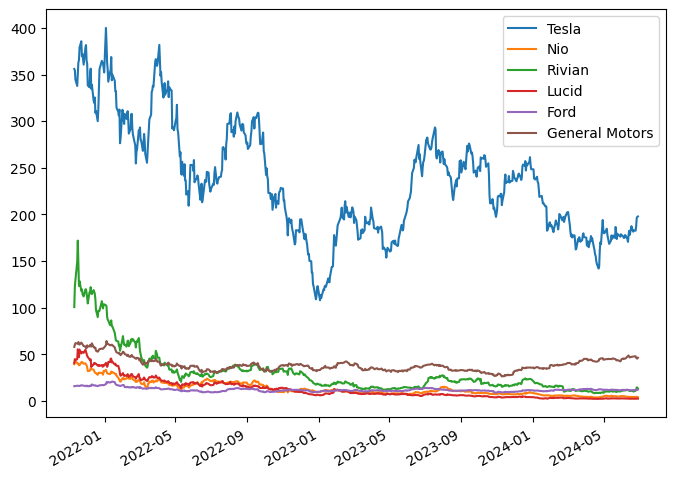

In [166]:
ax, fig = plt.subplots(figsize = (8, 6))

tesla_alligned.plot()
nio_alligned.plot()
rivian_alligned.plot()
lucid_alligned.plot()
ford_alligned.plot()
gm_alligned.plot()

plt.legend(labels = ["Tesla", "Nio", "Rivian", "Lucid", "Ford", "General Motors"])
plt.show()

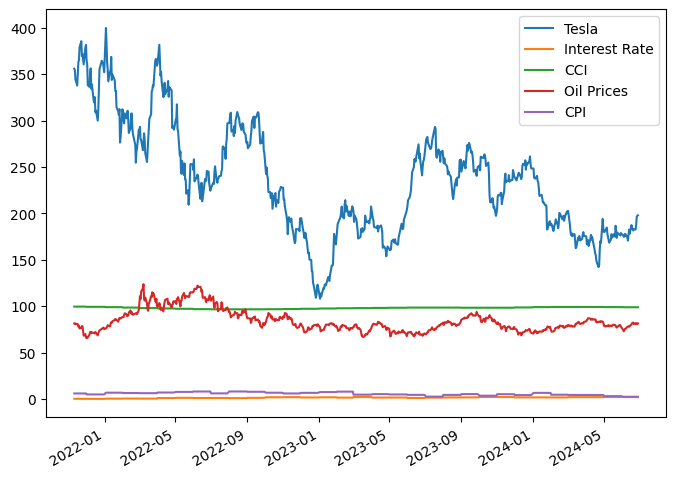

In [167]:
ax, fig = plt.subplots(figsize = (8, 6))

tesla_alligned.plot()
interest_rate_alligned.plot()
cci_alligned.plot()
oil_prices_alligned.plot()
cpi_alligned.plot()

plt.legend(labels = ["Tesla", "Interest Rate", "CCI", "Oil Prices", "CPI"])
plt.show()

Closer look to CCI, CPI and Interest Rate

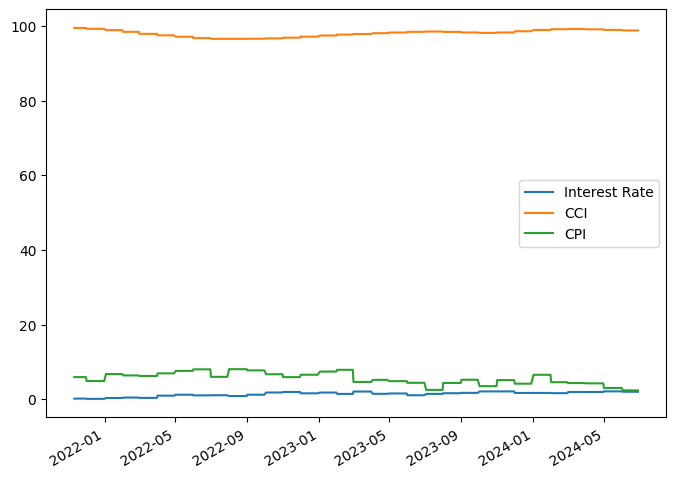

In [168]:
ax, fig = plt.subplots(figsize = (8, 6))

interest_rate_alligned.plot()
cci_alligned.plot()
cpi_alligned.plot()

plt.legend(labels = ["Interest Rate", "CCI", "CPI"])
plt.show()

## Decomposing the Time Series

In [169]:
def plot_ts_components(ts):
    ts_decompose = seasonal_decompose(ts, model = "additive", period = 250)
    ts_decompose.plot()
    plt.show()

In [170]:
tesla_alligned.name = "Tesla"
nio_alligned.name = "Nio"
rivian_alligned.name = "Rivian"
lucid_alligned.name = "Lucid Motors"
ford_alligned.name = "Ford"
gm_alligned.name = "General Motors"

In [171]:
stocks = [tesla_alligned, nio_alligned, rivian_alligned, lucid_alligned, ford_alligned, gm_alligned]
economic_ind = [interest_rate_alligned, cci_alligned, oil_prices_alligned, cpi_alligned]

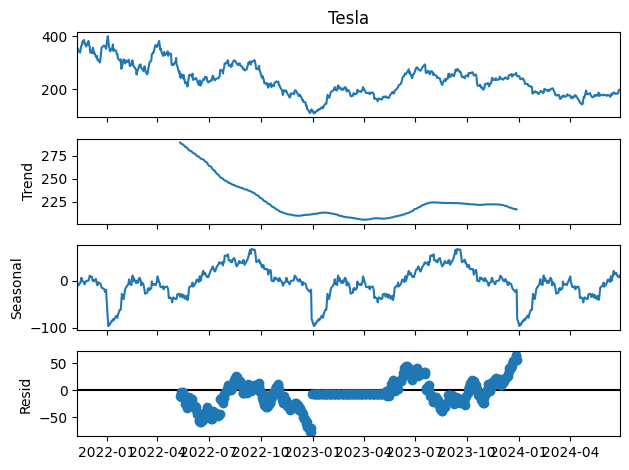

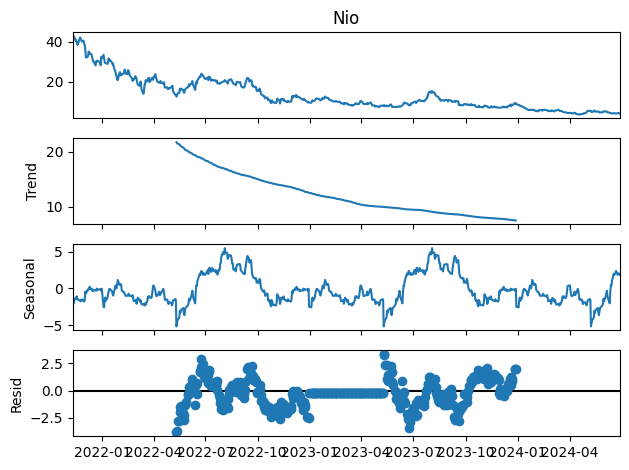

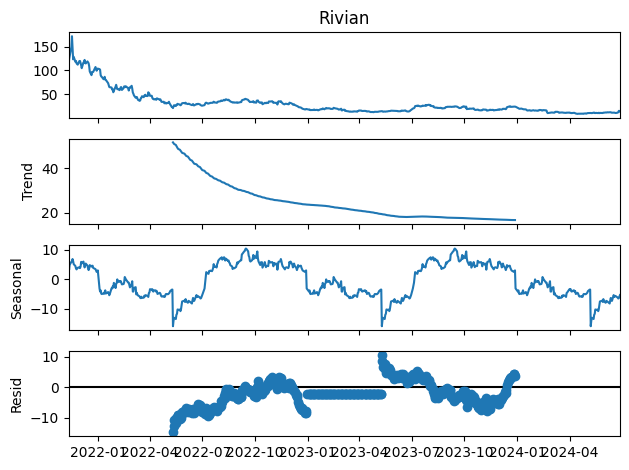

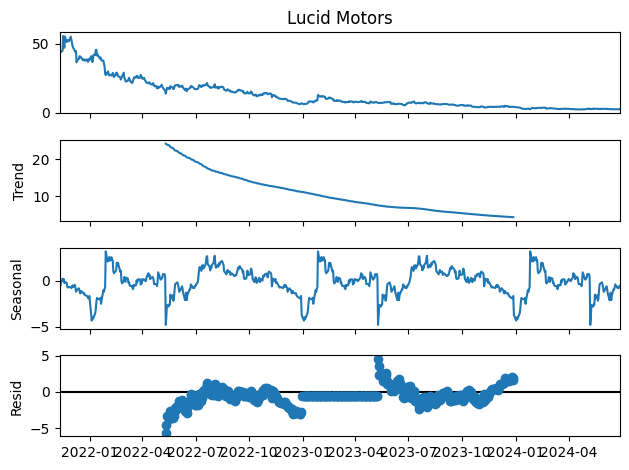

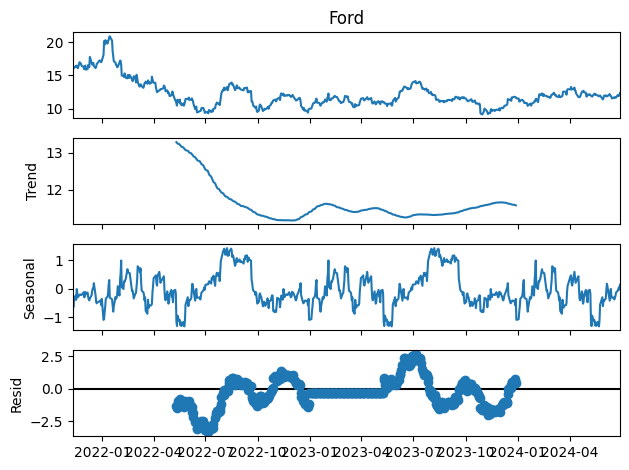

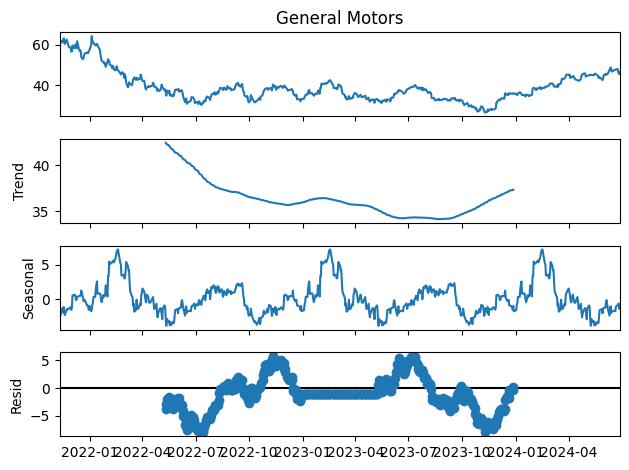

In [172]:
for stock in stocks:
    plot_ts_components(stock)

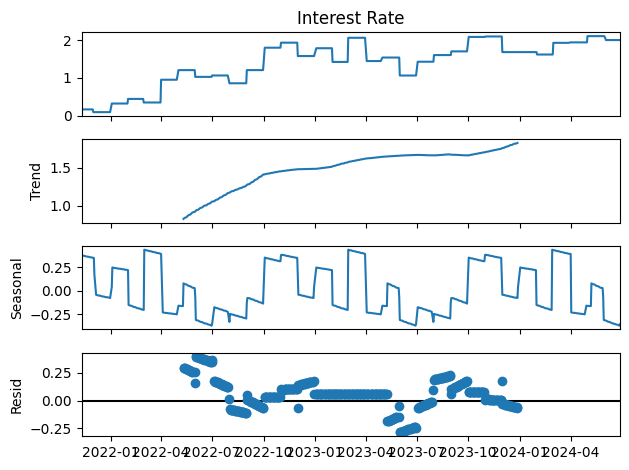

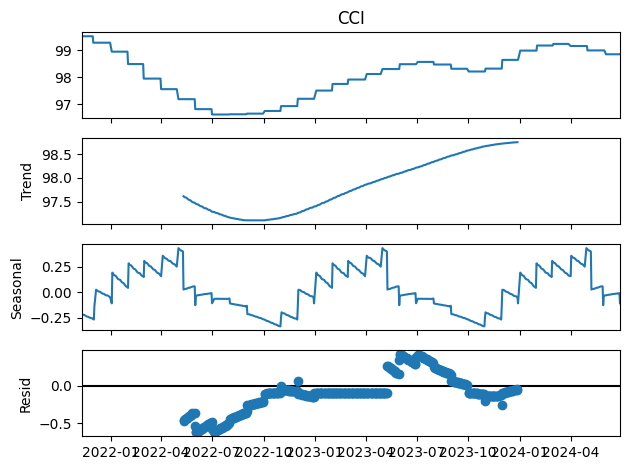

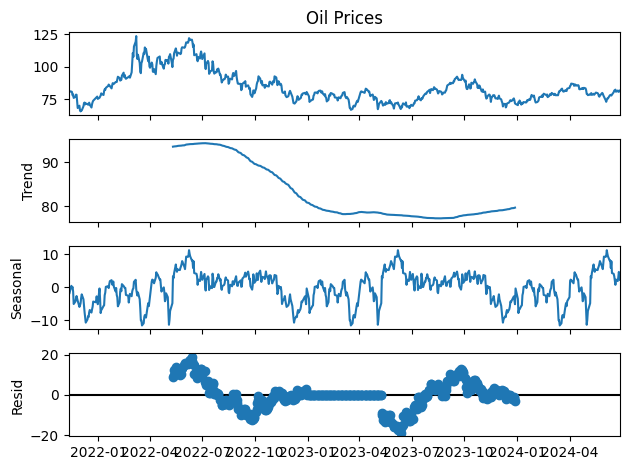

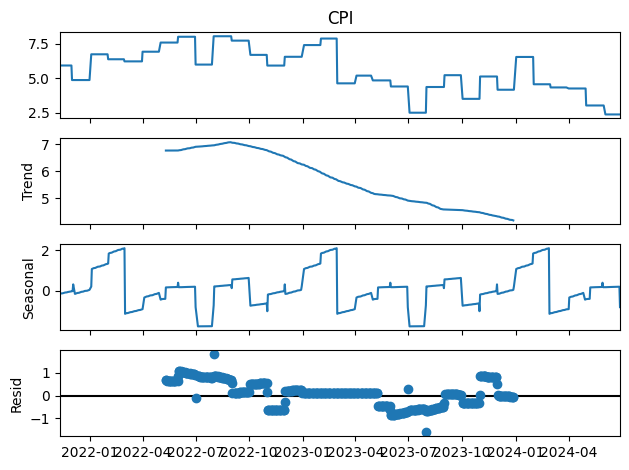

In [173]:
for ind in economic_ind:
    plot_ts_components(ind)

### Check for Stationarity: Augmented Dickey-Fuller Test 

In [174]:
def adf_test(ts):
    result = adfuller(ts)
    print(ts.name)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Conclusion:', 'Reject null hypothesis - Time series is stationary' if result[1] < 0.05 else 'Fail to reject null hypothesis - Time series is non-stationary')
    print("-" * 100)

In [175]:
for stock in stocks:
    adf_test(stock)

Tesla
ADF Statistic: -2.7808457598001275
p-value: 0.061062333138523654
Critical Values: {'1%': -3.4404504809576695, '5%': -2.8659967824852073, '10%': -2.569143417751479}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
----------------------------------------------------------------------------------------------------
Nio
ADF Statistic: -3.0506294358131925
p-value: 0.03042919994444273
Critical Values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}
Conclusion: Reject null hypothesis - Time series is stationary
----------------------------------------------------------------------------------------------------
Rivian
ADF Statistic: -5.673479342721084
p-value: 8.812763235495723e-07
Critical Values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}
Conclusion: Reject null hypothesis - Time series is stationary
-----------------------------------------------------------------------------------------

In [176]:
for ind in economic_ind:
    adf_test(ind)

Interest Rate
ADF Statistic: -2.0522865538557085
p-value: 0.264127851291379
Critical Values: {'1%': -3.440296841949105, '5%': -2.8659291016222834, '10%': -2.569107357667585}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
----------------------------------------------------------------------------------------------------
CCI
ADF Statistic: -1.4031752940451339
p-value: 0.5807528994667179
Critical Values: {'1%': -3.4406089407081604, '5%': -2.866066583404541, '10%': -2.5691806079101562}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
----------------------------------------------------------------------------------------------------
Oil Prices
ADF Statistic: -2.1916834494070985
p-value: 0.2092777198732635
Critical Values: {'1%': -3.440544963888275, '5%': -2.866038402294262, '10%': -2.569165592859072}
Conclusion: Fail to reject null hypothesis - Time series is non-stationary
--------------------------------------------------------------

### Check for correlation

Pearson Correlation

In [177]:
def corr_pearson(ts):
    correlation = tesla_alligned.corr(ts)
    print(f"Pearson Correlation Coefficient: {correlation}")

In [178]:
for stock in stocks:
    corr_pearson(stock)

Pearson Correlation Coefficient: 0.9999999999999999
Pearson Correlation Coefficient: 0.7909394979486457
Pearson Correlation Coefficient: 0.7492322877786025
Pearson Correlation Coefficient: 0.7652018017674369
Pearson Correlation Coefficient: 0.6681162647882694
Pearson Correlation Coefficient: 0.46664554829105953


In [179]:
for ind in economic_ind:
    corr_pearson(ind)

Pearson Correlation Coefficient: -0.7715837791336707
Pearson Correlation Coefficient: 0.015657215619986335
Pearson Correlation Coefficient: 0.28878720396019497
Pearson Correlation Coefficient: 0.23316067156065493


Granger Causality

In [180]:
def granger(ts):
    print(ts.name)
    df = pd.DataFrame({'tesla': tesla_alligned, 'ts': ts})

    max_lag = 5
    test_result = grangercausalitytests(df, max_lag)
    print("-" * 100)

In [181]:
for stock in stocks[1:]:
    granger(stock)

Nio

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6327  , p=0.2018  , df_denom=657, df_num=1
ssr based chi2 test:   chi2=1.6401  , p=0.2003  , df=1
likelihood ratio test: chi2=1.6381  , p=0.2006  , df=1
parameter F test:         F=1.6327  , p=0.2018  , df_denom=657, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7849  , p=0.4566  , df_denom=654, df_num=2
ssr based chi2 test:   chi2=1.5818  , p=0.4534  , df=2
likelihood ratio test: chi2=1.5799  , p=0.4539  , df=2
parameter F test:         F=0.7849  , p=0.4566  , df_denom=654, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6470  , p=0.5850  , df_denom=651, df_num=3
ssr based chi2 test:   chi2=1.9620  , p=0.5803  , df=3
likelihood ratio test: chi2=1.9591  , p=0.5809  , df=3
parameter F test:         F=0.6470  , p=0.5850  , df_denom=651, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0228  , p=0.39

In [182]:
for ind in economic_ind:
    granger(ind)

Interest Rate

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.1955 , p=0.0009  , df_denom=657, df_num=1
ssr based chi2 test:   chi2=11.2466 , p=0.0008  , df=1
likelihood ratio test: chi2=11.1519 , p=0.0008  , df=1
parameter F test:         F=11.1955 , p=0.0009  , df_denom=657, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4680  , p=0.0044  , df_denom=654, df_num=2
ssr based chi2 test:   chi2=11.0196 , p=0.0040  , df=2
likelihood ratio test: chi2=10.9285 , p=0.0042  , df=2
parameter F test:         F=5.4680  , p=0.0044  , df_denom=654, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8627  , p=0.0093  , df_denom=651, df_num=3
ssr based chi2 test:   chi2=11.7126 , p=0.0084  , df=3
likelihood ratio test: chi2=11.6096 , p=0.0088  , df=3
parameter F test:         F=3.8627  , p=0.0093  , df_denom=651, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0816

Cointegration

In [183]:
def coint_ts(ts):
    if adfuller(ts)[1] <= 0.05:
        diff_ts = ts.diff().dropna()
        tesla_alligned2 = tesla_alligned[1:]
        score, p_value, _ = coint(tesla_alligned2, diff_ts)
        print(f"Cointegration Test p-value for {ts.name} (diff): {p_value}")
    else:
        score, p_value, _ = coint(tesla_alligned, ts)
        print(f"Cointegration Test p-value for {ts.name}: {p_value}")

In [184]:
for stock in stocks[1:]:
    coint_ts(stock)

Cointegration Test p-value for Nio (diff): 0.22939208982335701
Cointegration Test p-value for Rivian (diff): 0.22880528410676837
Cointegration Test p-value for Lucid Motors (diff): 0.13220512461973433
Cointegration Test p-value for Ford: 0.3953513224845707
Cointegration Test p-value for General Motors: 0.49757968775245676


In [185]:
for ind in economic_ind[1:]:
    coint_ts(ind)

Cointegration Test p-value for CCI: 0.18181796072091932
Cointegration Test p-value for Oil Prices: 0.06166411687960404
Cointegration Test p-value for CPI: 0.12305539795094522


### Plot ACF and PACF

In [186]:
def plot_acf_pacf(ts):

    if adfuller(ts)[1] <= 0.05:
        ts = ts.diff().dropna()
        ts.name = f"{ts.name} (Diff)"

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    plot_acf(ts, ax=axes[0], lags=40)
    axes[0].set_title('Autocorrelation Function (ACF)')

    plot_pacf(ts, ax=axes[1], lags=40)
    axes[1].set_title('Partial Autocorrelation Function (PACF)')

    fig.suptitle(f"{ts.name} ACF and PACF")
    plt.tight_layout()
    plt.show()

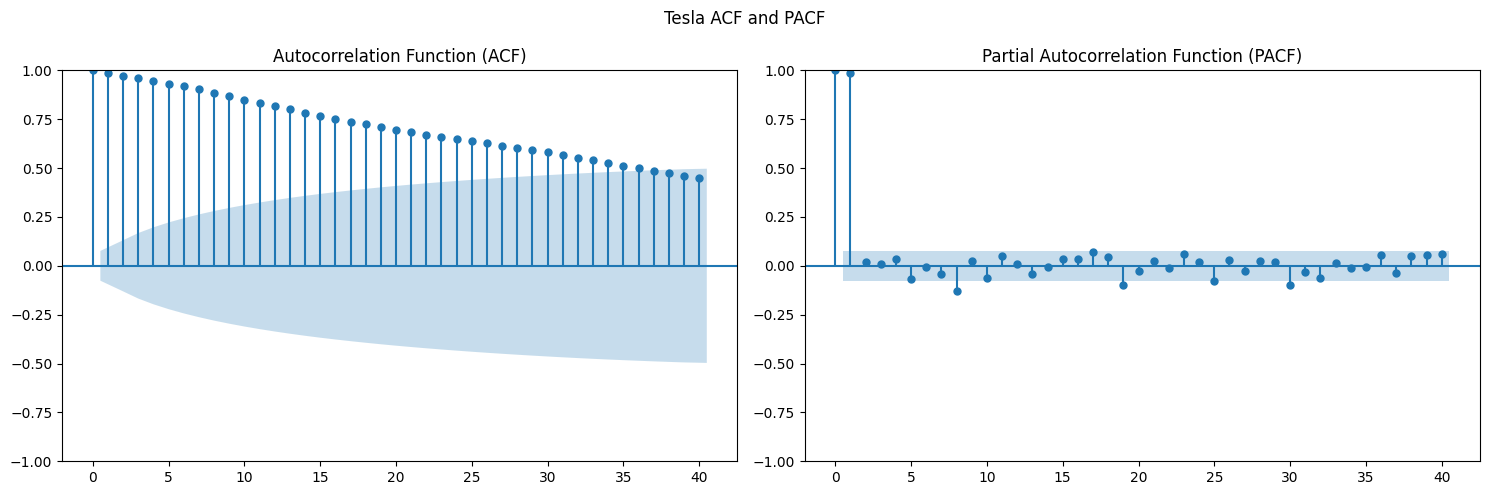

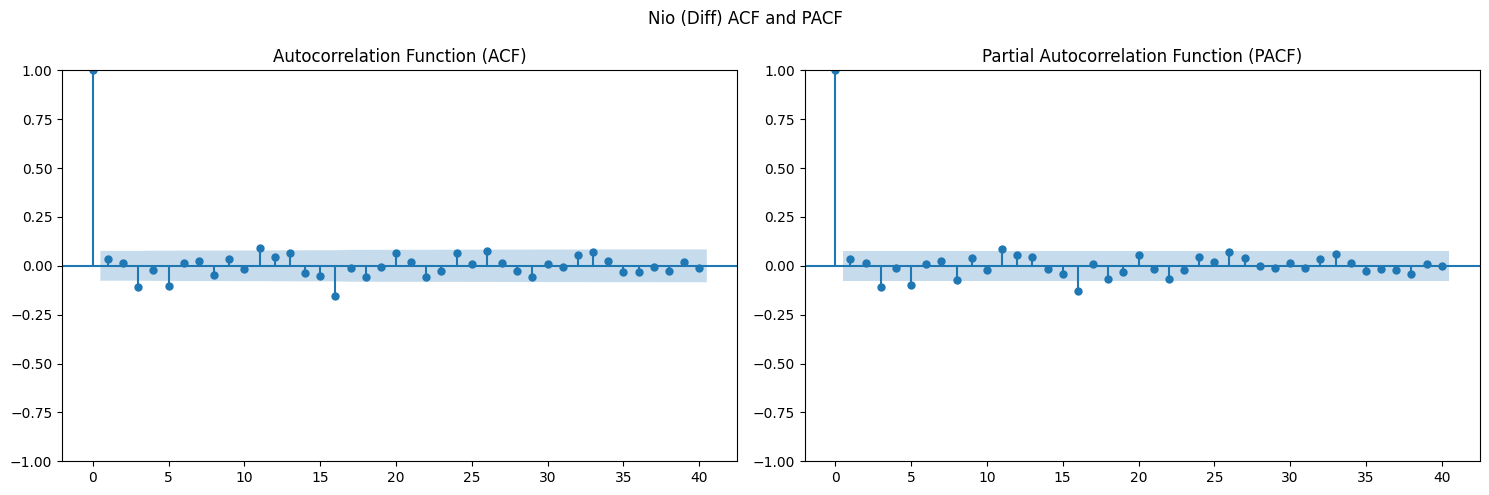

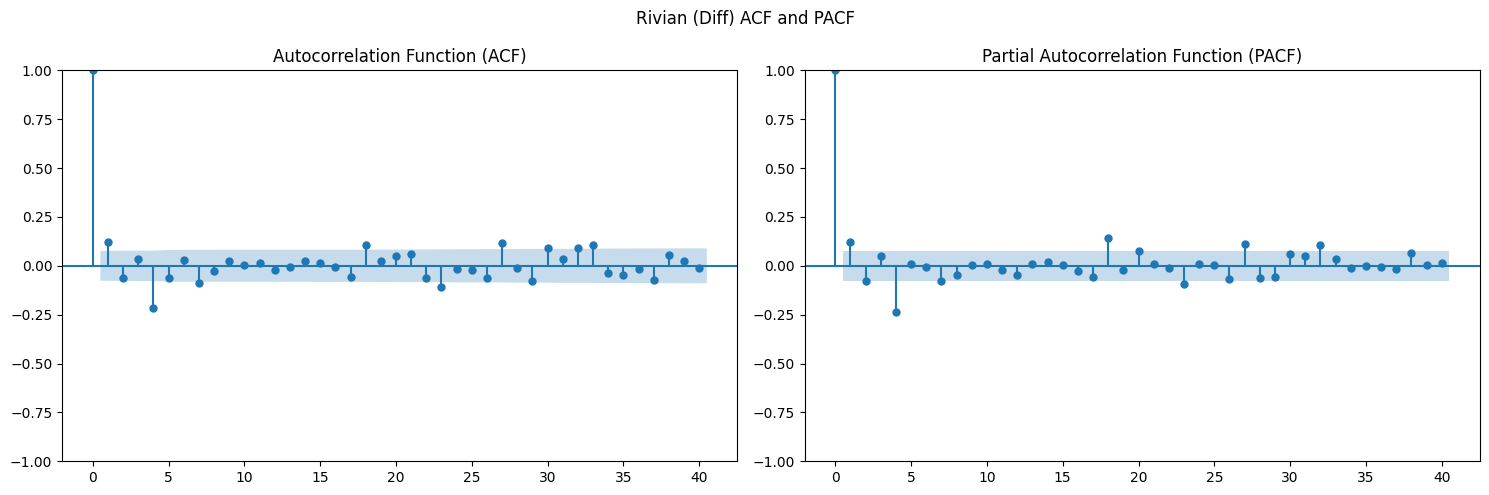

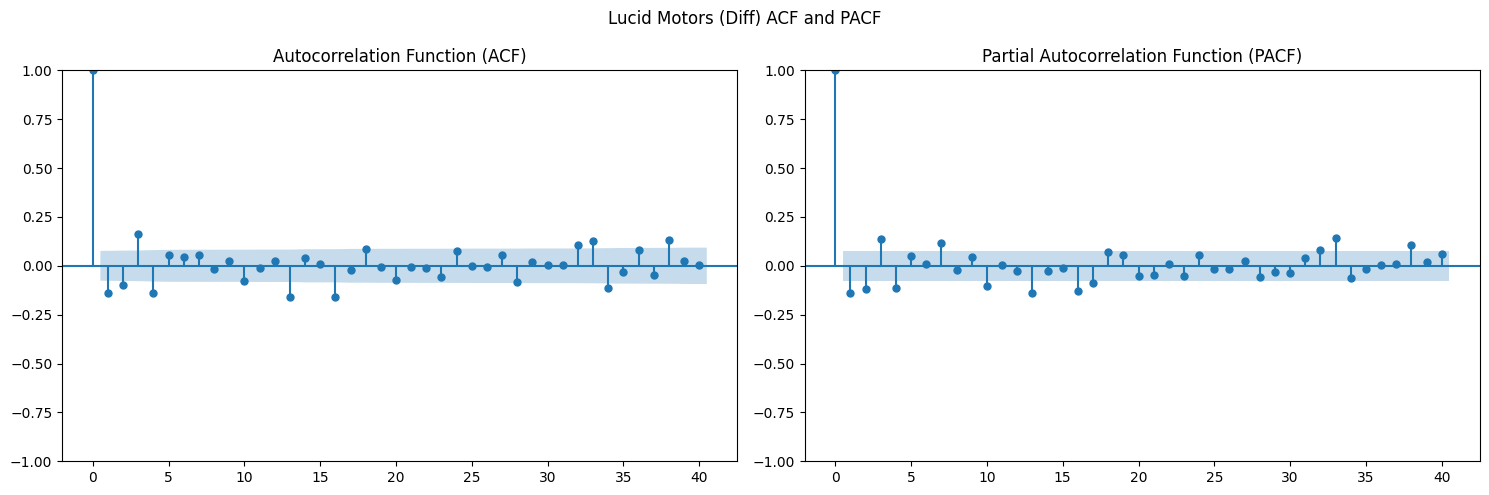

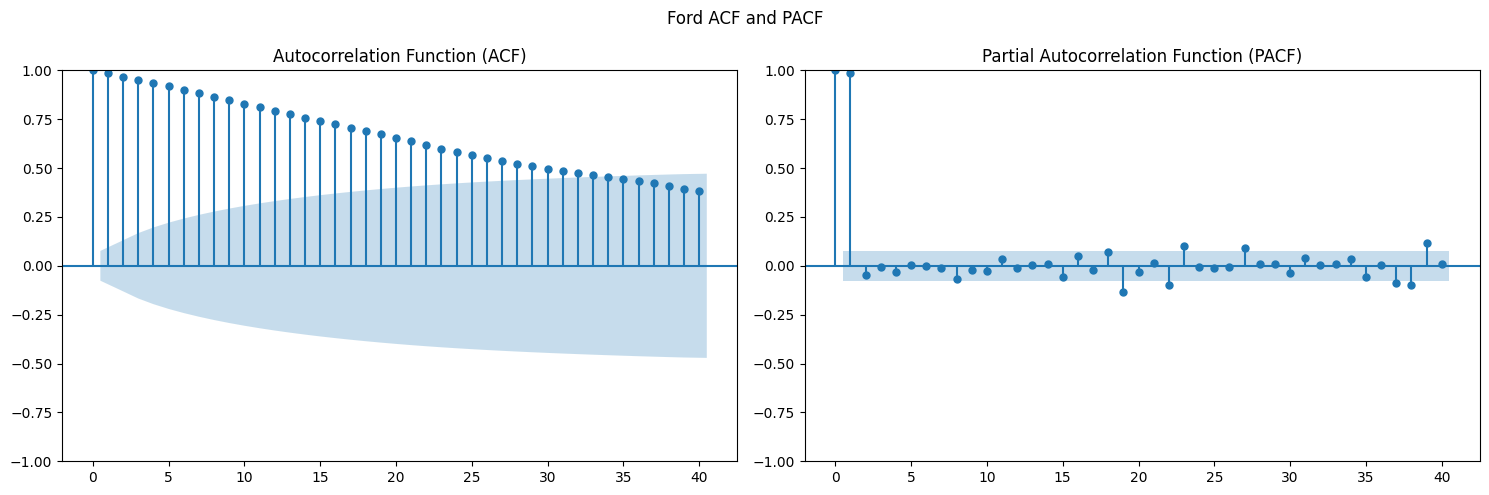

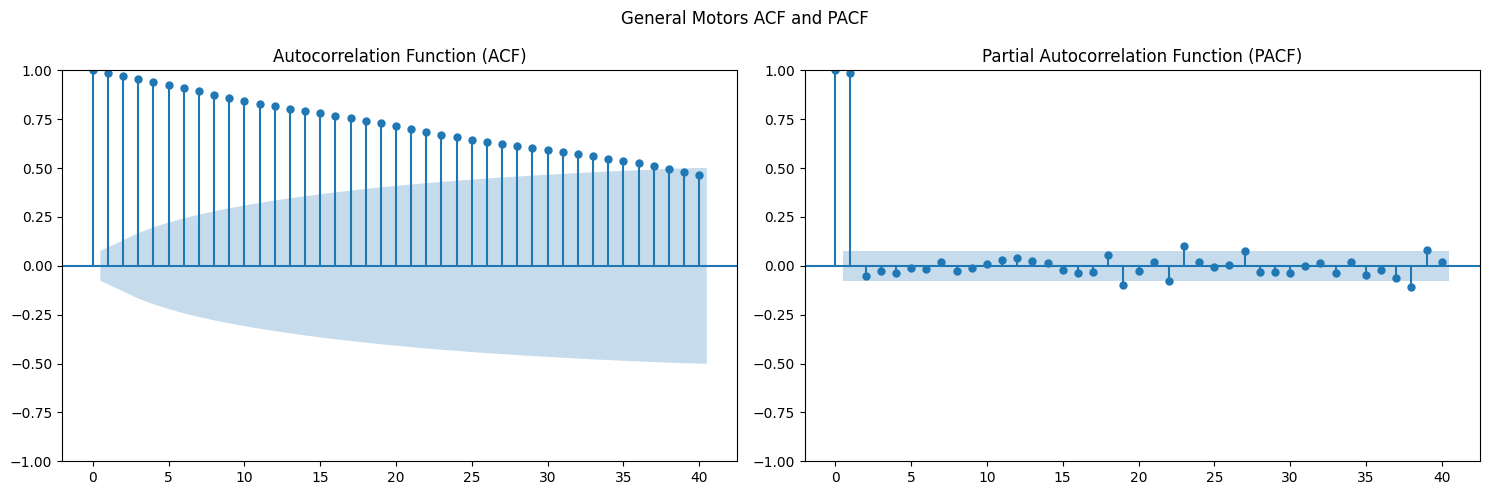

In [187]:
for stock in stocks:
    plot_acf_pacf(stock)

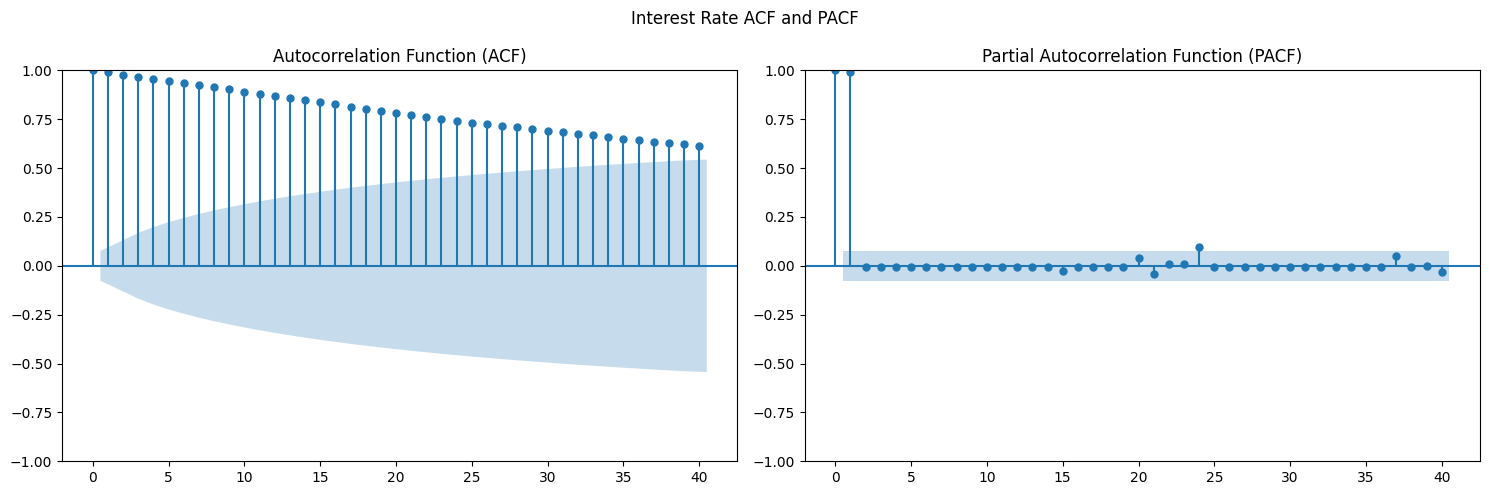

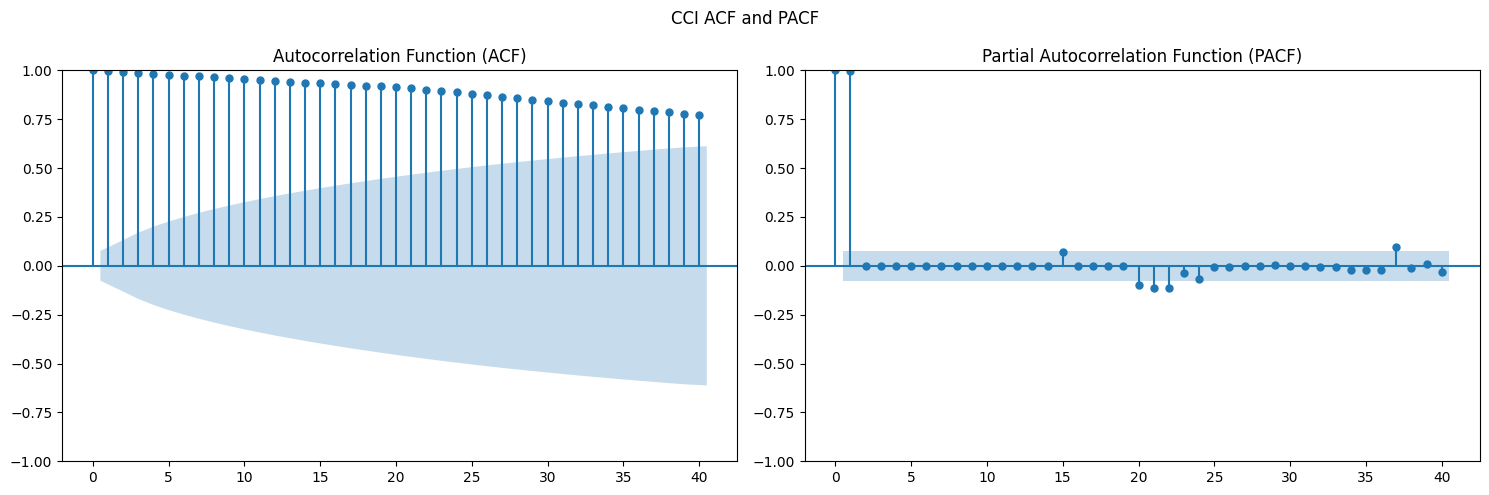

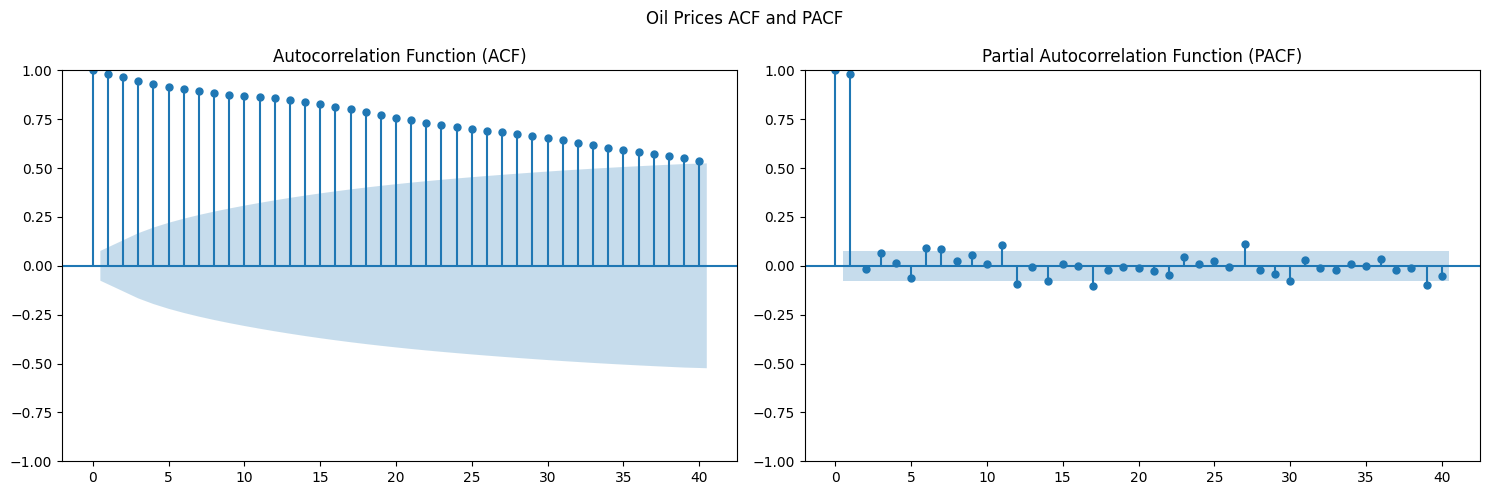

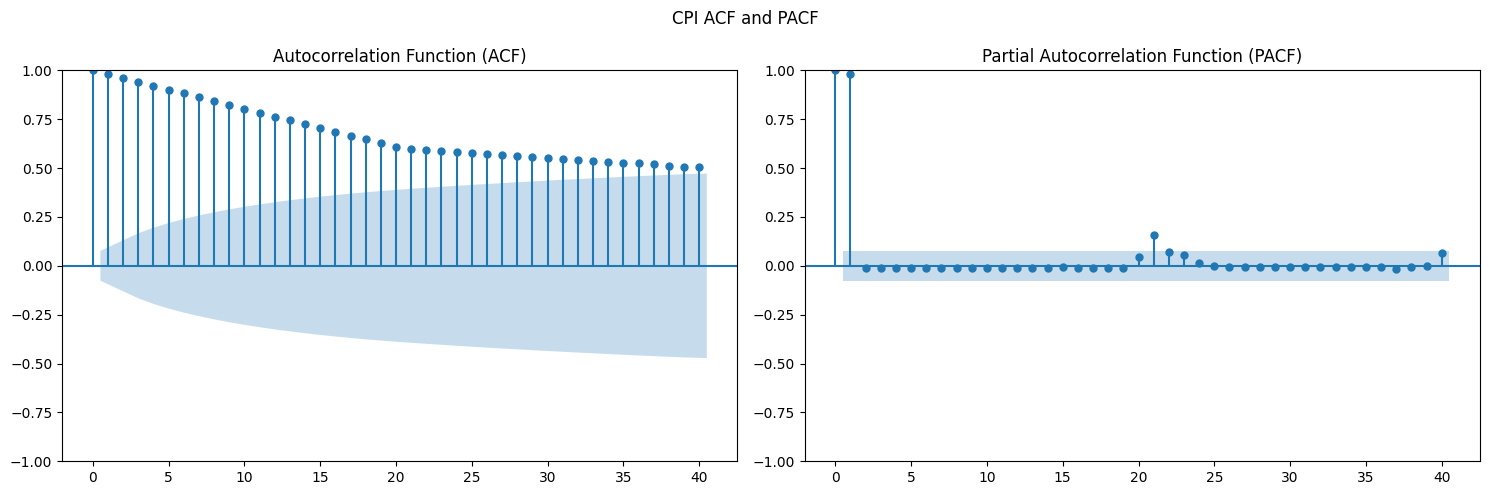

In [188]:
for ind in economic_ind:
    plot_acf_pacf(ind)

## Save Data

In [189]:
data = pd.DataFrame(stocks).T.join(pd.DataFrame(economic_ind).T)
data.head()

,Tesla,Nio,Rivian,Lucid Motors,Ford,General Motors,Interest Rate,CCI,Oil Prices,CPI
2021-11-10,355.983337,39.549999,100.730003,40.750000,15.992259,58.052616,0.163998,99.53249,81.340,5.921978
2021-11-11,354.503326,42.200001,122.989998,44.980000,16.149210,60.550247,0.163998,99.53249,81.590,5.921978
2021-11-12,344.473328,42.669998,129.949997,43.930000,16.107906,62.097797,0.163998,99.53249,80.790,5.921978
2021-11-15,337.796661,40.570000,149.360001,44.880001,16.405285,61.676624,0.163998,99.53249,80.880,5.921978
2021-11-16,351.576660,40.669998,172.009995,55.520000,16.347464,61.324028,0.163998,99.53249,80.556,5.921978


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 661 entries, 2021-11-10 to 2024-06-28
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tesla           661 non-null    float64
 1   Nio             661 non-null    float64
 2   Rivian          661 non-null    float64
 3   Lucid Motors    661 non-null    float64
 4   Ford            661 non-null    float64
 5   General Motors  661 non-null    float64
 6   Interest Rate   661 non-null    float64
 7   CCI             661 non-null    float64
 8   Oil Prices      661 non-null    float64
 9   CPI             661 non-null    float64
dtypes: float64(10)
memory usage: 73.0 KB


In [191]:
data.to_csv("../data/process/data.csv")